In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
baseline_dir = "/content/drive/MyDrive/rl_results/baseline 2/"
rl_dir = "/content/drive/MyDrive/rl_results/rl/"

In [ ]:
import os
baseline_files = os.listdir(baseline_dir)
baseline_files.sort()
baseline_files = [baseline_dir+each+'/baseline_result_data.json' for each in baseline_files]

In [ ]:
rl_files = os.listdir(baseline_dir)
rl_files.sort()
rl_files = [rl_dir+each+'/best_prompt_result_data.json' for each in baseline_files]

In [ ]:
baseline_files[0]

'/content/drive/MyDrive/rl_results/baseline 2/1575_A. Another Sorting Problem/baseline_result_data.json'

In [ ]:
rl_files[0]

'/content/drive/MyDrive/rl_results/rl//content/drive/MyDrive/rl_results/baseline 2/1575_A. Another Sorting Problem/baseline_result_data.json/best_prompt_result_data.json'

In [ ]:
import json
baseline0 = json.loads(open(baseline_files[0]).read())
print(baseline0['accuracies'], baseline0['diversities'])
baseline0_accuracy = sum(baseline0['accuracies'])/4
baseline0_diversity = sum(baseline0['diversities'])/4
baseline0_structural_div = sum([each[0] for each in baseline0['diversities_detail']])/4
baseline0_semantic_div = sum([each[1] for each in baseline0['diversities_detail']])/4

baseline0_accuracy, baseline0_diversity, baseline0_structural_div, baseline0_semantic_div

[0.3, 0.3, 0.3, 0.3] [0.0, 0.0, 0.0, 0.0]


(0.3, 0.0, 0.0, 0.0)

In [ ]:
rl0 = json.loads(open(rl_files[0]).read())
print(rl0['accuracies'], baseline0['diversities'])
rl0_accuracy = sum(rl0['accuracies'])/4
rl0_diversity = sum(rl0['diversities'])/4
rl0_accuracy, rl0_diversity

[0.0, 0.0, 0.3, 0.0] [0.2656695156695157, 0.2656695156695157, 0.2656695156695157, 0.2656695156695157]


(0.075, 0.34031862745098035)

In [ ]:
sorted(rl_accuracies)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.005,
 0.005,
 0.01,
 0.01,
 0.01,
 0.01,
 0.015,
 0.015,
 0.02,
 0.02,
 0.025,
 0.025,
 0.03,
 0.04,
 0.04,
 0.06,
 0.065,
 0.075,
 0.075,
 0.085,
 0.1,
 0.11,
 0.13,
 0.135,
 0.22499999999999998,
 0.25,
 0.26,
 0.32499999999999996,
 0.345,
 0.34500000000000003,
 0.37,
 0.54,
 0.72,
 0.73,
 0.79,
 0.94]

In [ ]:
rl_accuracies.index(0.79)

26

In [ ]:
rl_files[26]

'/content/drive/MyDrive/rl_results/rl/1582_A. Luntik and Concerts/best_prompt_result_data.json'

In [ ]:
code = "import sys\n\nfor _ in range(int(sys.stdin.readline())):\n    a, b, c = map(int, sys.stdin.readline().split())\n    total = a + 2*b + 3*c\n    first_concert = (a + 2*b + 3*c) // 2\n    second_concert = total - first_concert\n    print(min(abs(first_concert - second_concert), abs(first_concert - (total - first_concert))))"
print(code)

import sys

for _ in range(int(sys.stdin.readline())):
    a, b, c = map(int, sys.stdin.readline().split())
    total = a + 2*b + 3*c
    first_concert = (a + 2*b + 3*c) // 2
    second_concert = total - first_concert
    print(min(abs(first_concert - second_concert), abs(first_concert - (total - first_concert))))


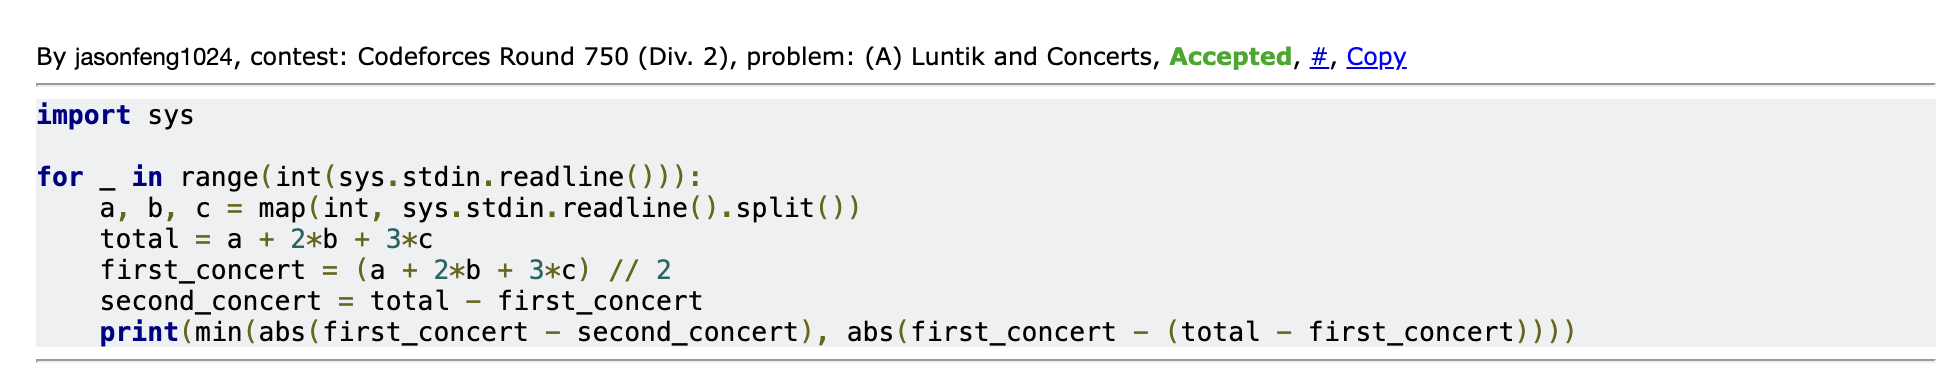

In [ ]:
code = "t = int(input())\nfor _ in range(t):\n    a, b, c = map(int, input().split())\n    total = a + 2*b + 3*c\n    first = a + 2*b\n    second = total - first\n    print(min(abs(first-second), abs(total-second)))"
print(code)

t = int(input())
for _ in range(t):
    a, b, c = map(int, input().split())
    total = a + 2*b + 3*c
    first = a + 2*b
    second = total - first
    print(min(abs(first-second), abs(total-second)))


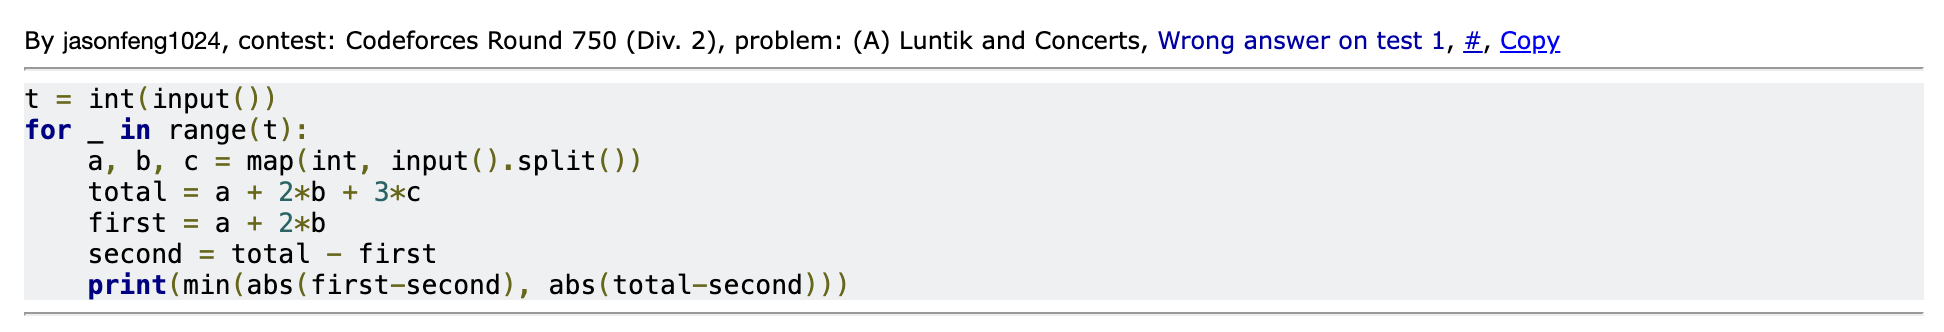

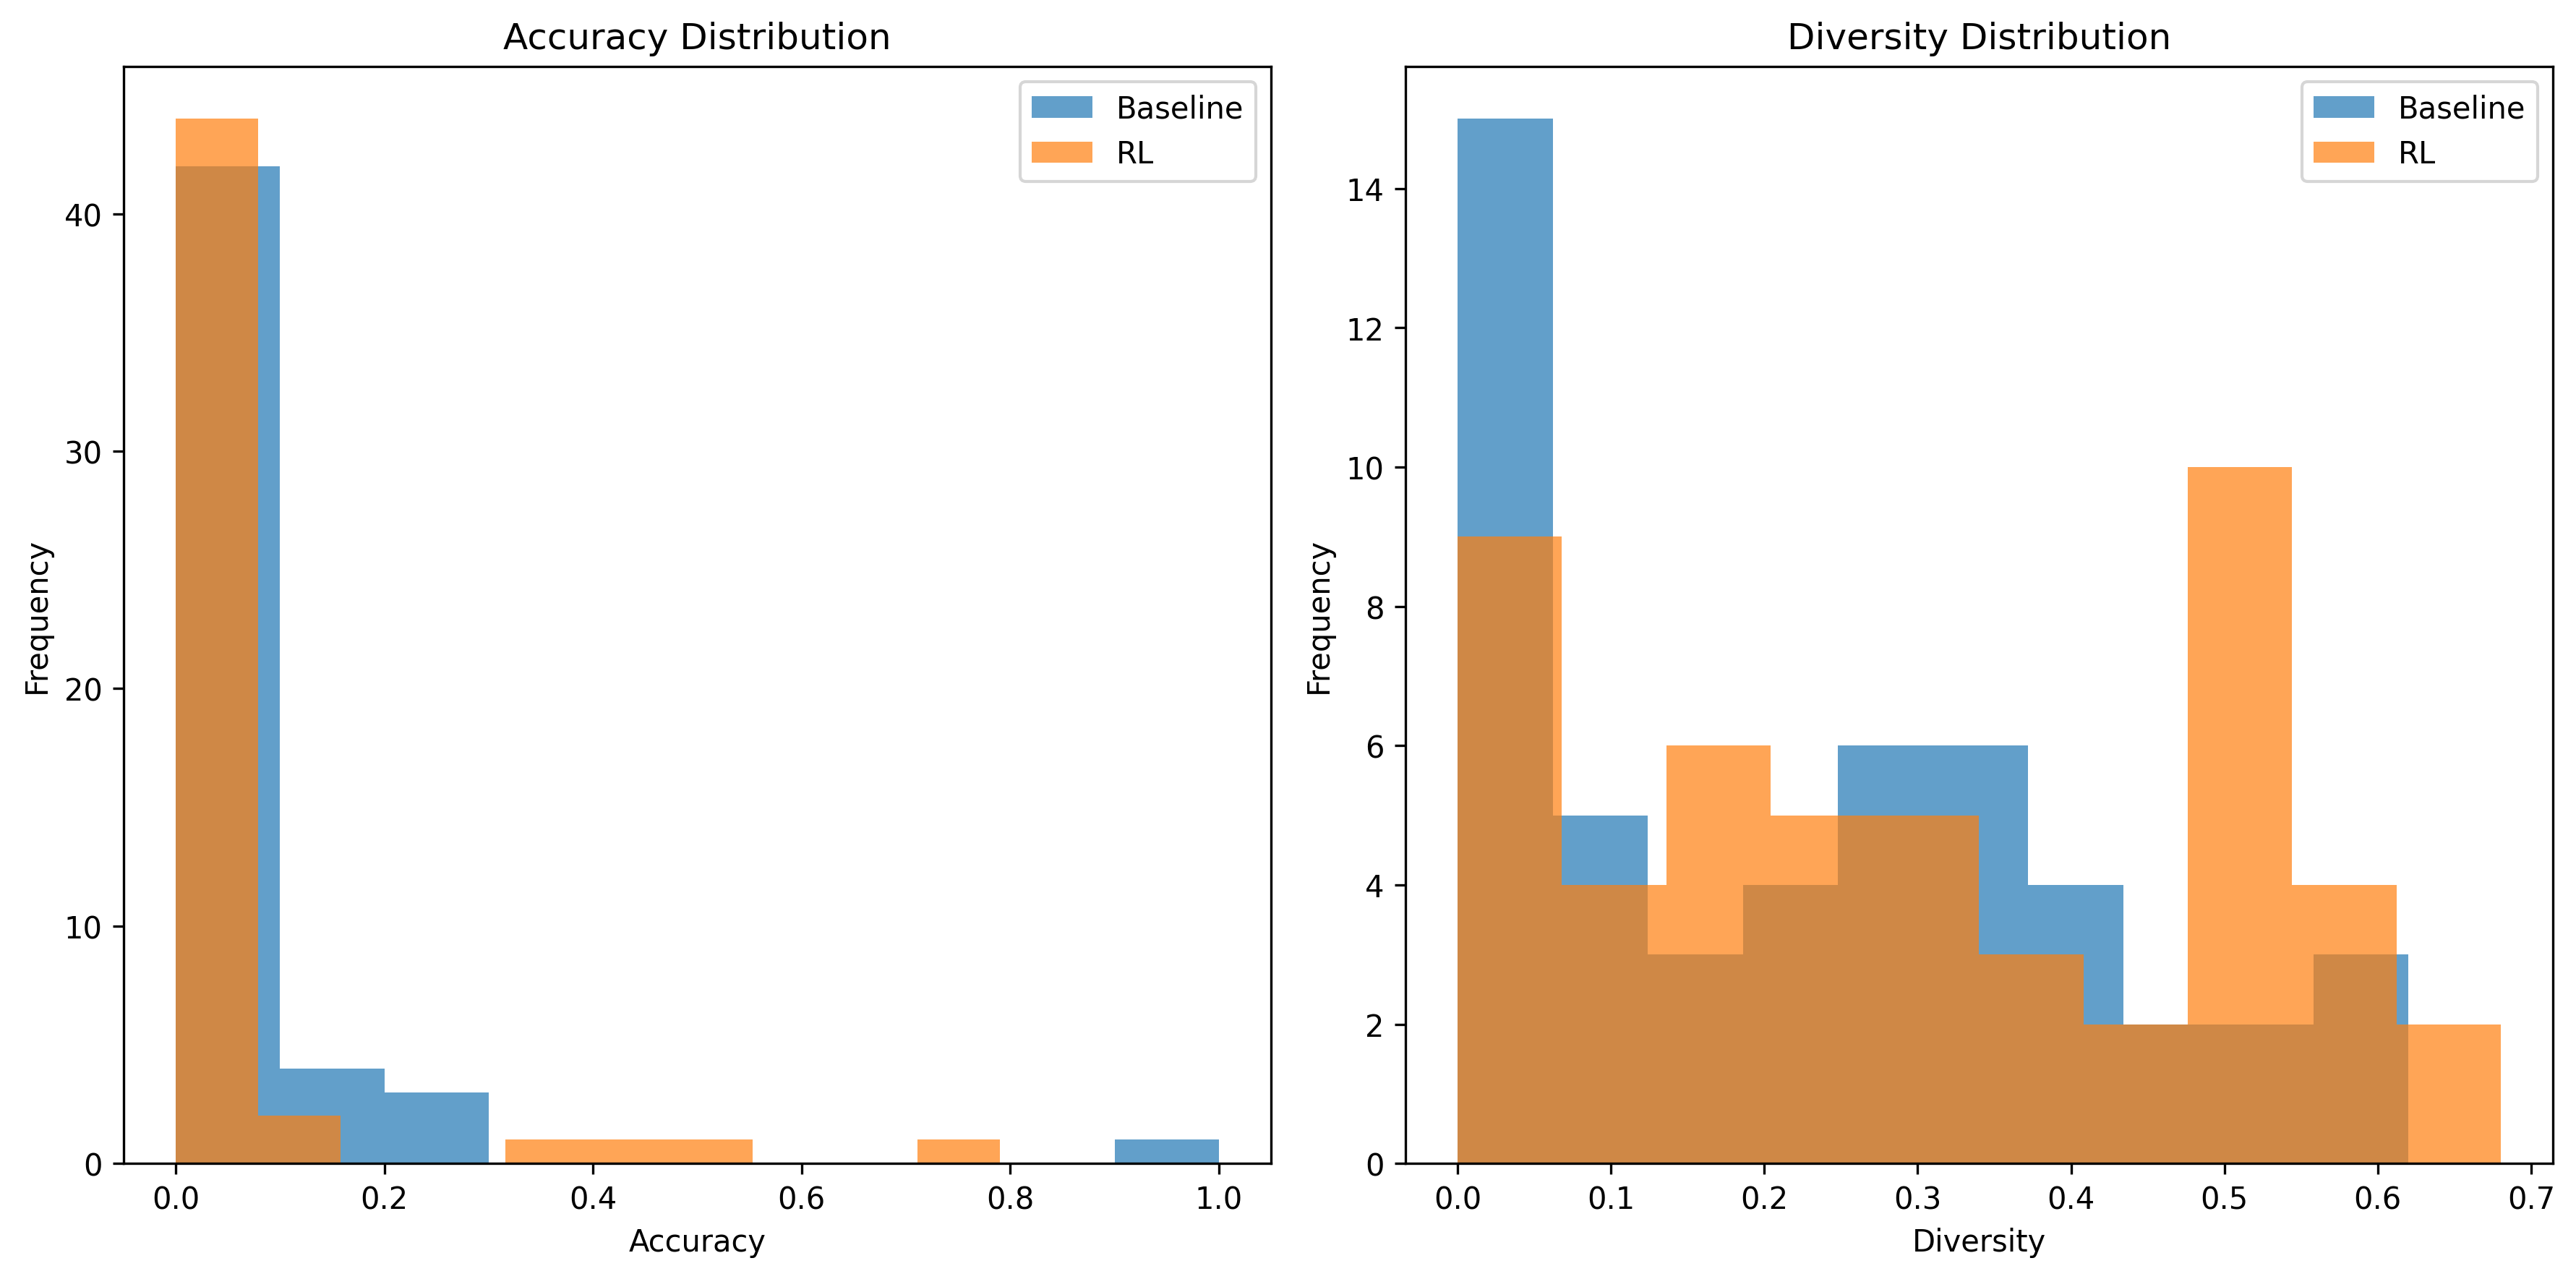

(0.059999999999999984,
 0.05689999999999999,
 0.21773702210420773,
 0.29610094363997314)

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# Define directories
baseline_dir = "/content/drive/MyDrive/rl_results/baseline 2/"
rl_dir = "/content/drive/MyDrive/rl_results/baseline 4/"

# Get and sort files
baseline_files = sorted(os.listdir(baseline_dir))
baseline_files = [os.path.join(baseline_dir, each, 'baseline_result_data.json') for each in baseline_files][:50]

rl_files = sorted(os.listdir(rl_dir))
rl_files = [os.path.join(rl_dir, each, 'baseline_result_data.json') for each in rl_files][:50]

# Initialize lists to store overall accuracies and diversities
baseline_accuracies, baseline_diversities = [], []
rl_accuracies, rl_diversities = [], []

# Process baseline files
for file in baseline_files:
    with open(file, 'r') as f:
        data = json.load(f)
        baseline_accuracies.append(sum(data['accuracies']) / len(data['accuracies']))
        baseline_diversities.append(sum(data['diversities']) / len(data['diversities']))

# Process RL files
for file in rl_files:
    with open(file, 'r') as f:
        data = json.load(f)
        rl_accuracies.append(sum(data['accuracies']) / len(data['accuracies']))
        rl_diversities.append(sum(data['diversities']) / len(data['diversities']))

# Calculate overall averages
overall_baseline_accuracy = sum(baseline_accuracies) / len(baseline_accuracies)
overall_rl_accuracy = sum(rl_accuracies) / len(rl_accuracies)

overall_baseline_diversity = sum(baseline_diversities) / len(baseline_diversities)
overall_rl_diversity = sum(rl_diversities) / len(rl_diversities)

# Plot distributions
plt.figure(figsize=(12, 6),dpi=300)

# Plot accuracy distributions
plt.subplot(1, 2, 1)
plt.hist(baseline_accuracies, bins=10, alpha=0.7, label='Baseline')
plt.hist(rl_accuracies, bins=10, alpha=0.7, label='RL')
plt.title('Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()

# Plot diversity distributions
plt.subplot(1, 2, 2)
plt.hist(baseline_diversities, bins=10, alpha=0.7, label='Baseline')
plt.hist(rl_diversities, bins=10, alpha=0.7, label='RL')
plt.title('Diversity Distribution')
plt.xlabel('Diversity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Display overall averages
overall_baseline_accuracy, overall_rl_accuracy, overall_baseline_diversity, overall_rl_diversity


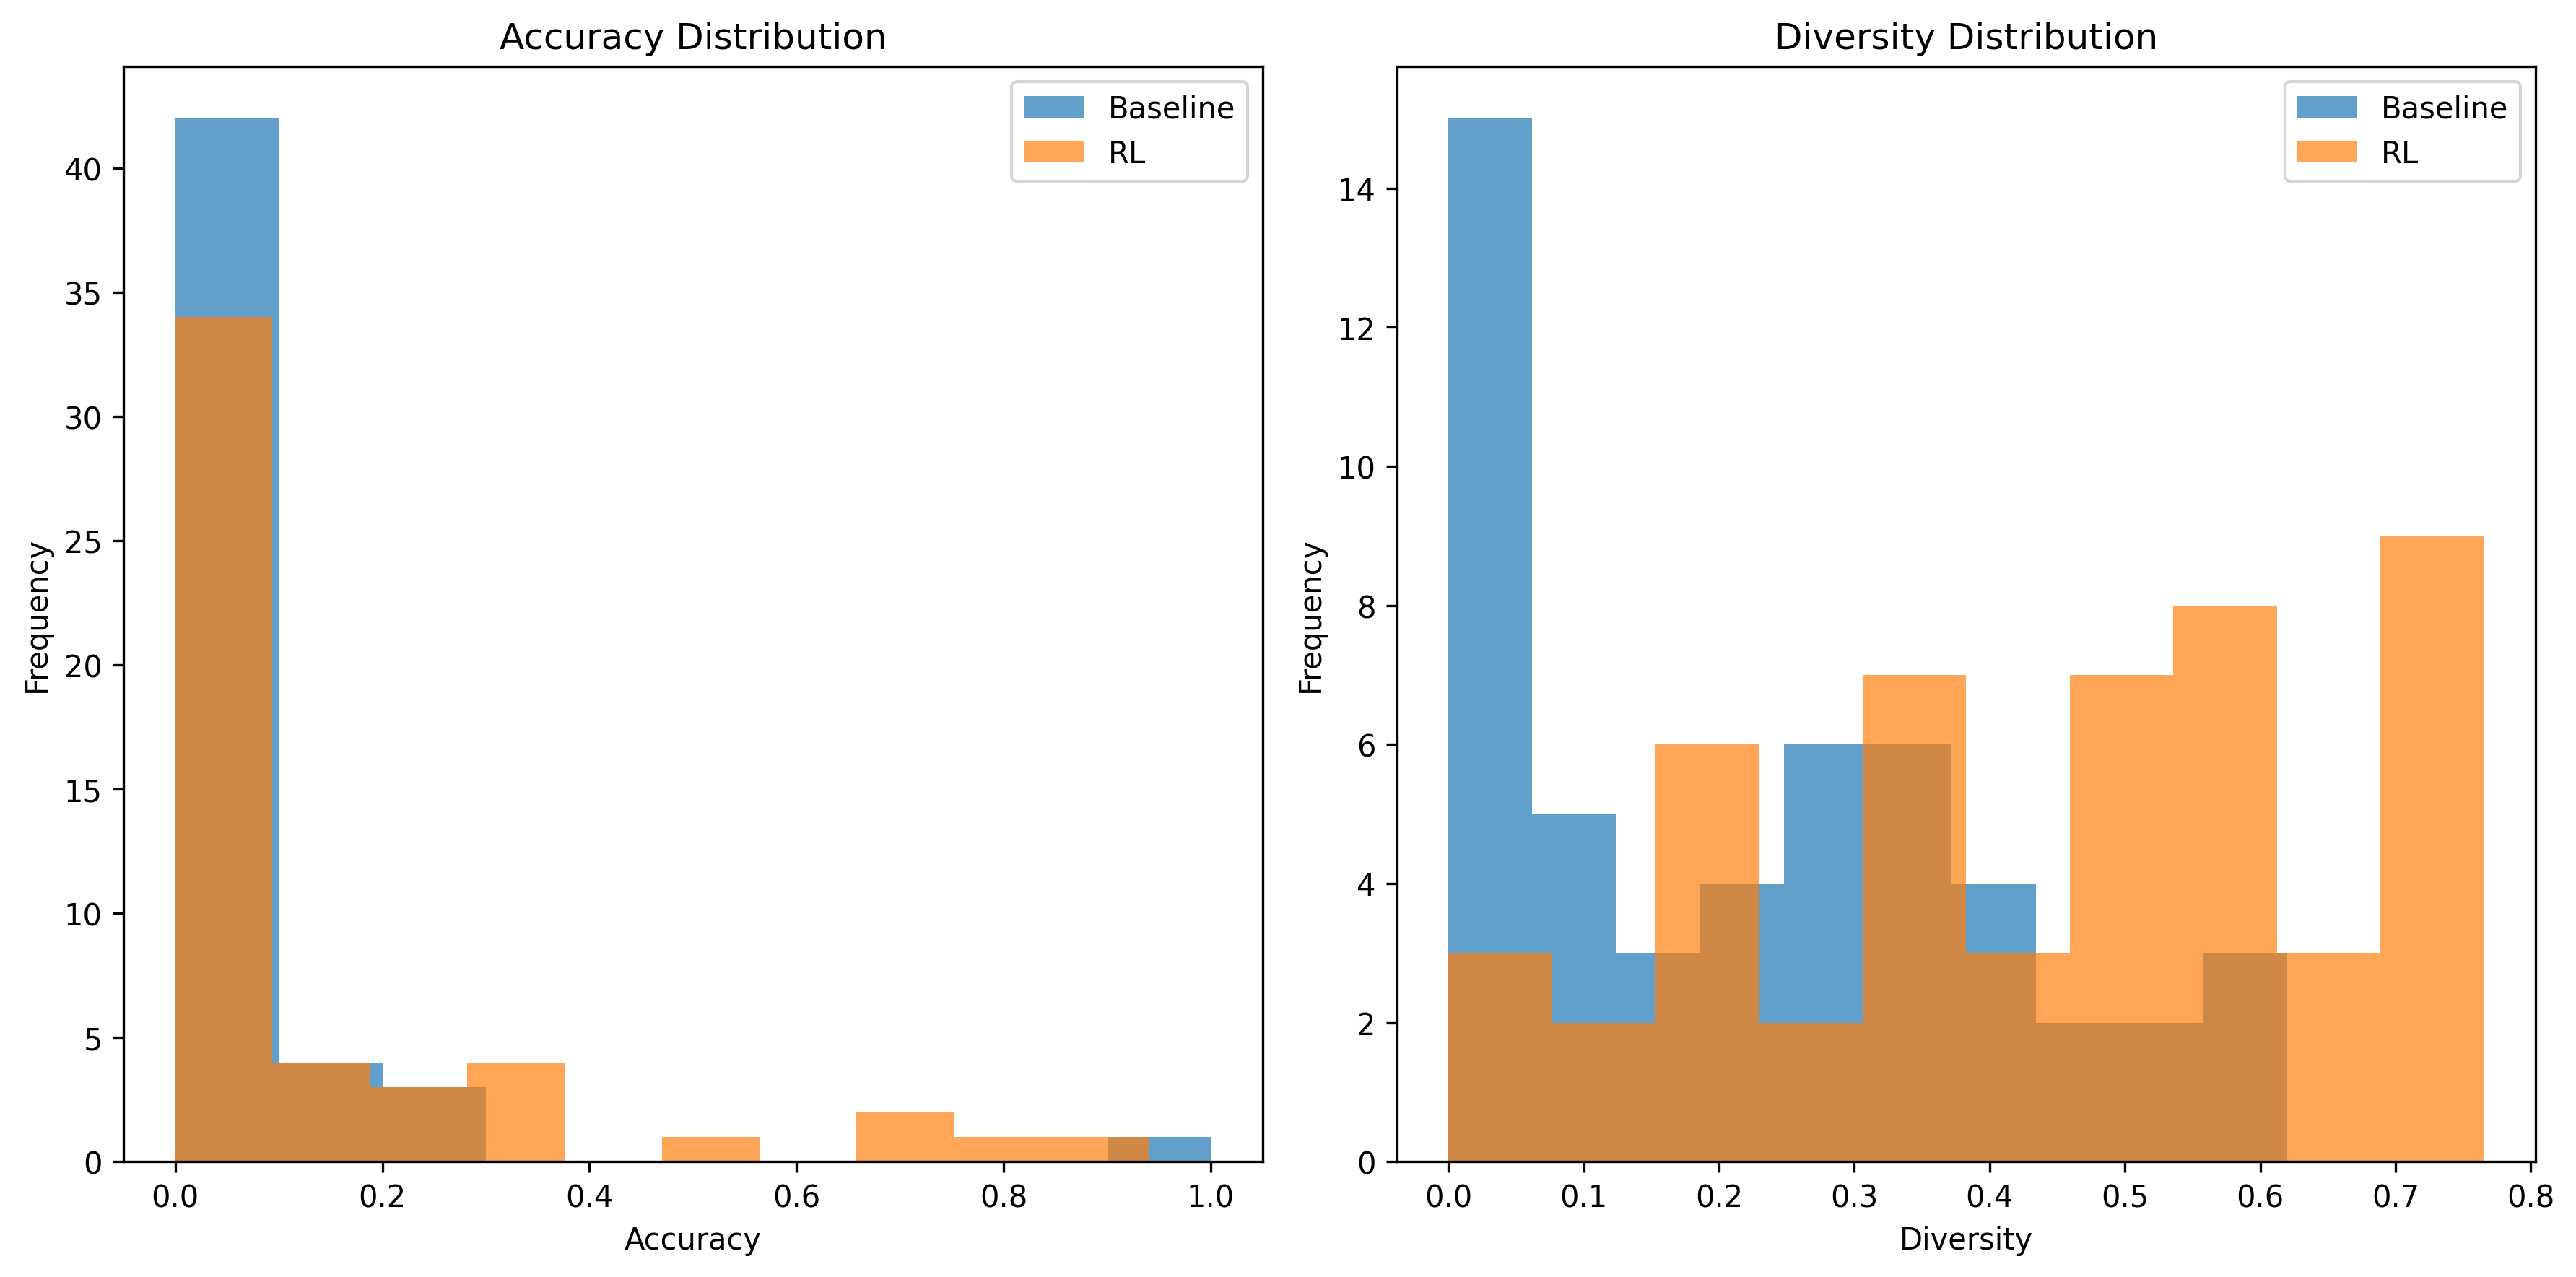

(0.059999999999999984,
 0.13909999999999995,
 0.21773702210420773,
 0.43757420248942575)

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# Define directories
baseline_dir = "/content/drive/MyDrive/rl_results/baseline 2/"
rl_dir = "/content/drive/MyDrive/rl_results/rl/"

# Get and sort files
baseline_files = sorted(os.listdir(baseline_dir))
baseline_files = [os.path.join(baseline_dir, each, 'baseline_result_data.json') for each in baseline_files][:50]

rl_files = sorted(os.listdir(rl_dir))
rl_files = [os.path.join(rl_dir, each, 'best_prompt_result_data.json') for each in rl_files][:50]

# Initialize lists to store overall accuracies and diversities
baseline_accuracies, baseline_diversities = [], []
rl_accuracies, rl_diversities = [], []

# Process baseline files
for file in baseline_files:
    with open(file, 'r') as f:
        data = json.load(f)
        baseline_accuracies.append(sum(data['accuracies']) / len(data['accuracies']))
        baseline_diversities.append(sum(data['diversities']) / len(data['diversities']))

# Process RL files
for file in rl_files:
    with open(file, 'r') as f:
        data = json.load(f)
        rl_accuracies.append(sum(data['accuracies']) / len(data['accuracies']))
        rl_diversities.append(sum(data['diversities']) / len(data['diversities']))

# Calculate overall averages
overall_baseline_accuracy = sum(baseline_accuracies) / len(baseline_accuracies)
overall_rl_accuracy = sum(rl_accuracies) / len(rl_accuracies)

overall_baseline_diversity = sum(baseline_diversities) / len(baseline_diversities)
overall_rl_diversity = sum(rl_diversities) / len(rl_diversities)

# Plot distributions
plt.figure(figsize=(12, 6),dpi=300)

# Plot accuracy distributions
plt.subplot(1, 2, 1)
plt.hist(baseline_accuracies, bins=10, alpha=0.7, label='Baseline')
plt.hist(rl_accuracies, bins=10, alpha=0.7, label='RL')
plt.title('Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()

# Plot diversity distributions
plt.subplot(1, 2, 2)
plt.hist(baseline_diversities, bins=10, alpha=0.7, label='Baseline')
plt.hist(rl_diversities, bins=10, alpha=0.7, label='RL')
plt.title('Diversity Distribution')
plt.xlabel('Diversity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Display overall averages
overall_baseline_accuracy, overall_rl_accuracy, overall_baseline_diversity, overall_rl_diversity


In [ ]:
overall_baseline_accuracy, overall_rl_accuracy, overall_baseline_diversity, overall_rl_diversity


(0.059999999999999984,
 0.13909999999999995,
 0.21773702210420773,
 0.43757420248942575)

(0.059999999999999984,
 0.13909999999999995,
 0.21773702210420773,
 0.43757420248942575)

In [ ]:
# Initialize lists to store mean and max accuracies
baseline_mean_accuracies, baseline_max_accuracies = [], []
rl_mean_accuracies, rl_max_accuracies = [], []

# Process baseline files for mean and max accuracies
for file in baseline_files:
    with open(file, 'r') as f:
        data = json.load(f)
        mean_accuracy = sum(data['accuracies']) / len(data['accuracies'])
        max_accuracy = max(data['accuracies'])
        baseline_mean_accuracies.append(mean_accuracy)
        baseline_max_accuracies.append(max_accuracy)

# Process RL files for mean and max accuracies
for file in rl_files:
    with open(file, 'r') as f:
        data = json.load(f)
        mean_accuracy = sum(data['accuracies']) / len(data['accuracies'])
        max_accuracy = max(data['accuracies'])
        rl_mean_accuracies.append(mean_accuracy)
        rl_max_accuracies.append(max_accuracy)

# Calculate overall mean and max accuracies
overall_baseline_mean_accuracy = sum(baseline_mean_accuracies) / len(baseline_mean_accuracies)
overall_rl_mean_accuracy = sum(rl_mean_accuracies) / len(rl_mean_accuracies)

overall_baseline_max_accuracy = sum(baseline_max_accuracies) / len(baseline_mean_accuracies)
overall_rl_max_accuracy = sum(rl_max_accuracies)/ len(rl_max_accuracies)

# Display results
overall_baseline_mean_accuracy, overall_rl_mean_accuracy, overall_baseline_max_accuracy, overall_rl_max_accuracy


(0.059999999999999984, 0.13909999999999995, 0.0924, 0.19959999999999997)

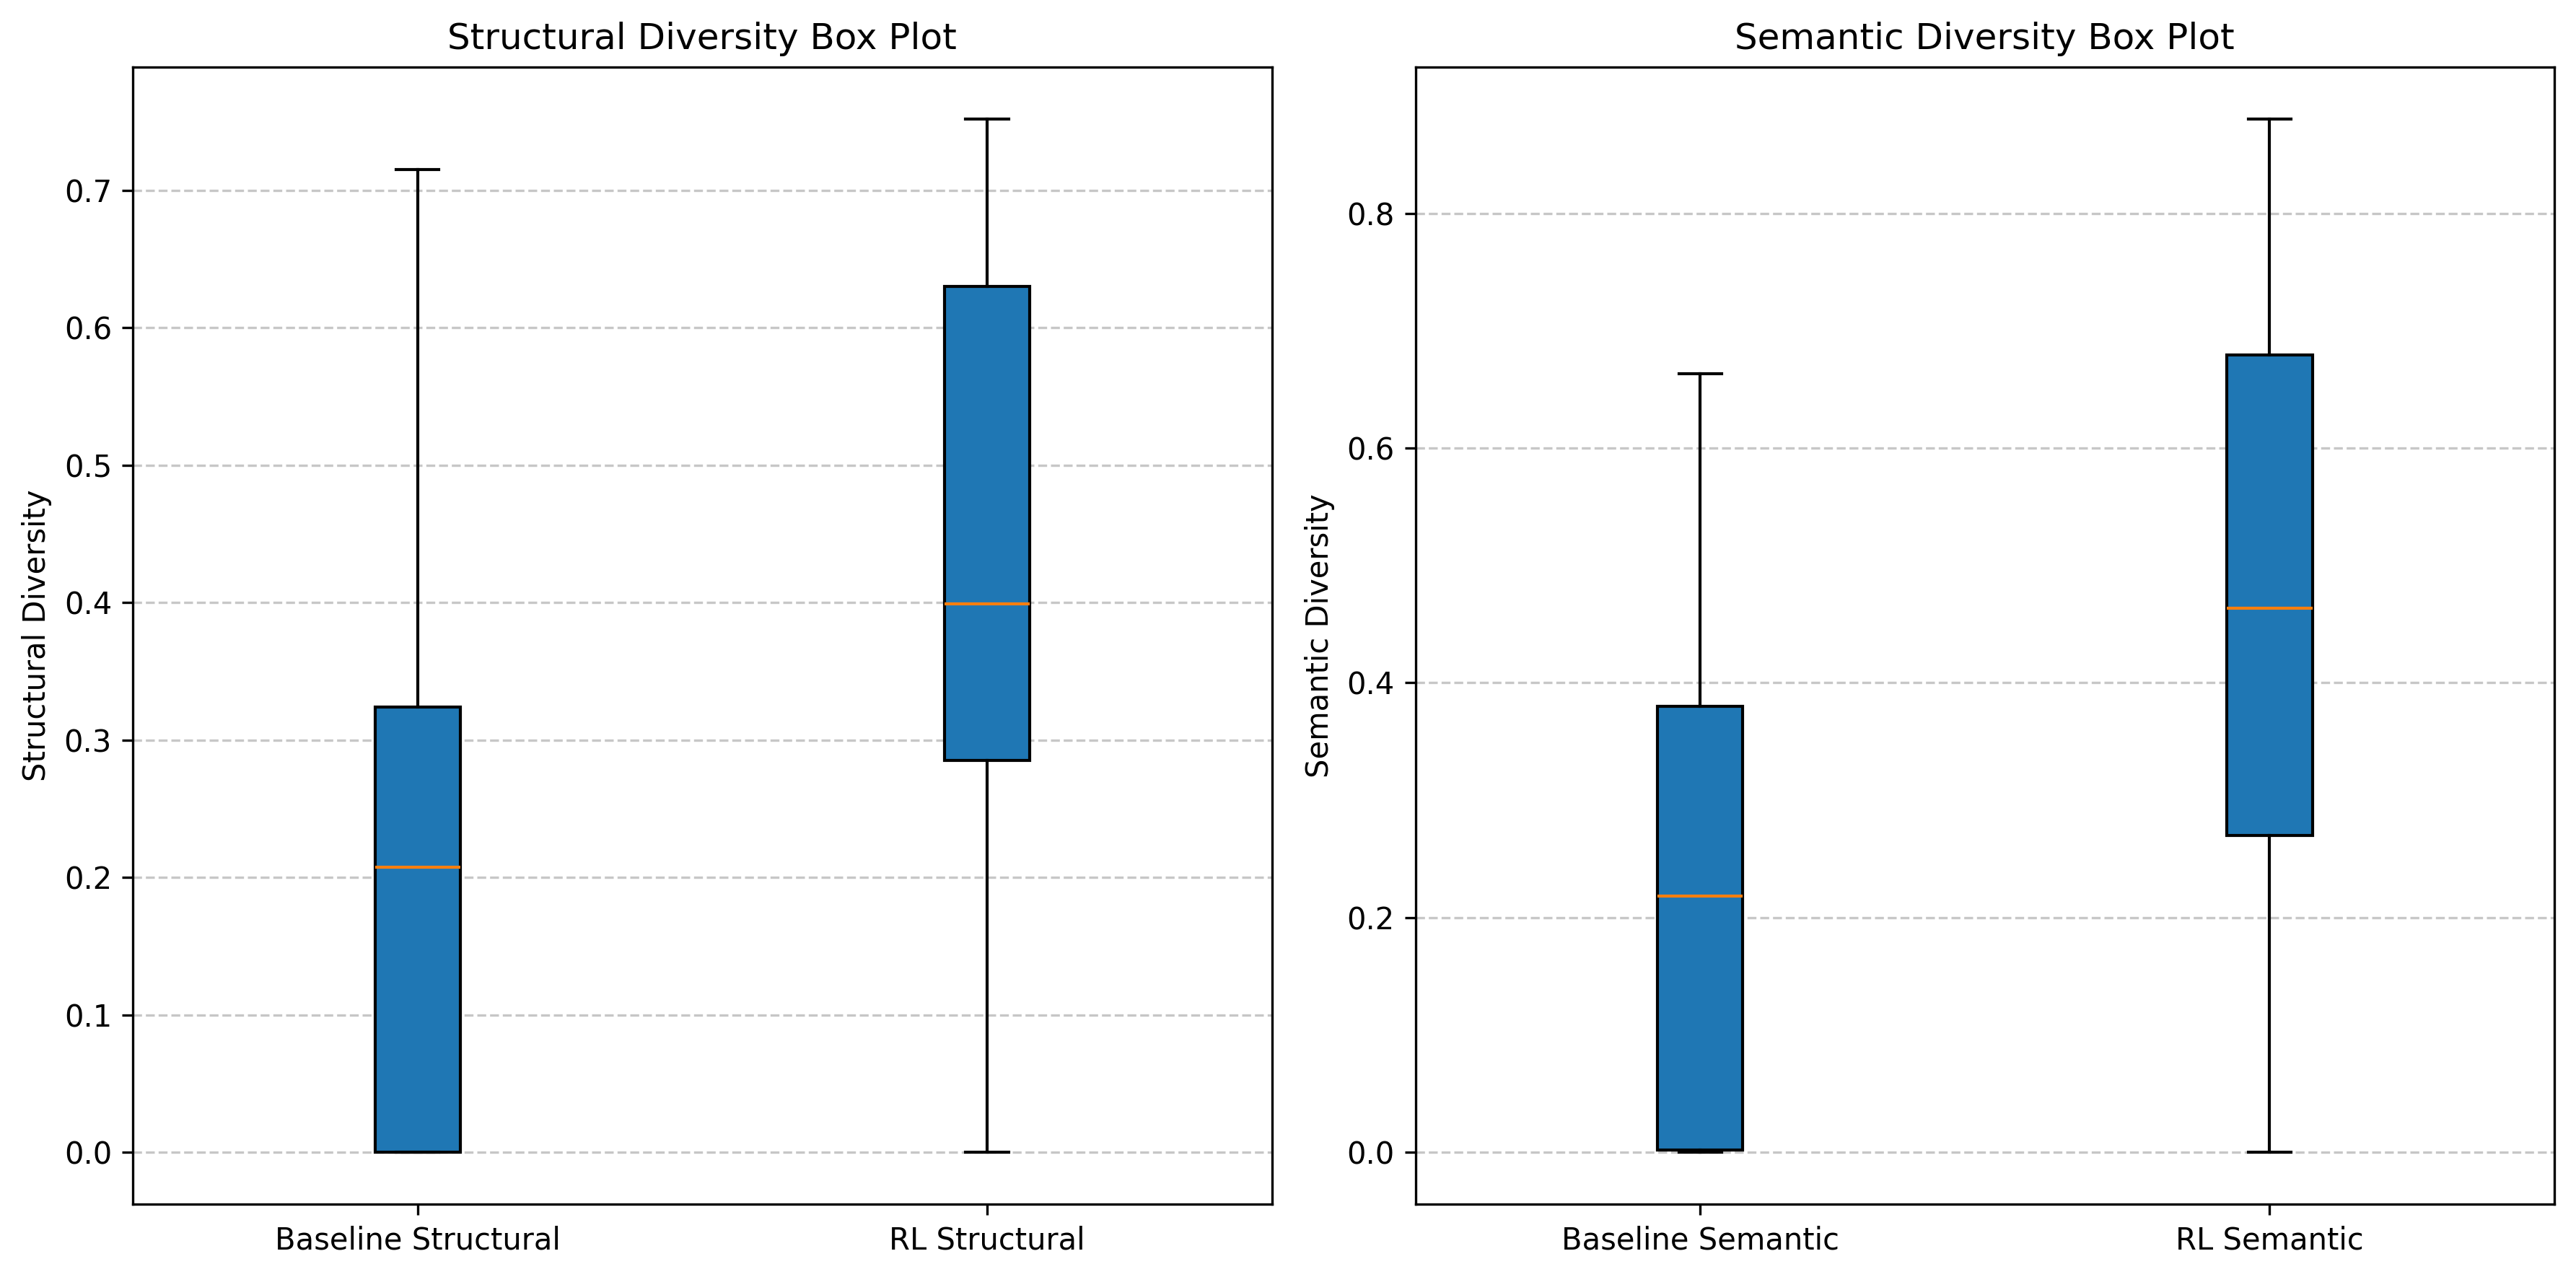

In [ ]:
# Initialize lists to store structural and semantic diversities
baseline_structural_divs, baseline_semantic_divs = [], []
rl_structural_divs, rl_semantic_divs = [], []

# Process baseline files for structural and semantic diversities
for file in baseline_files:
    with open(file, 'r') as f:
        data = json.load(f)
        structural_div = sum([div[0] for div in data['diversities_detail']]) / len(data['diversities_detail'])
        semantic_div = sum([div[1] for div in data['diversities_detail']]) / len(data['diversities_detail'])
        baseline_structural_divs.append(structural_div)
        baseline_semantic_divs.append(semantic_div)

# Process RL files for structural and semantic diversities
for file in rl_files:
    with open(file, 'r') as f:
        data = json.load(f)
        structural_div = sum([div[0] for div in data['diversities_detail']]) / len(data['diversities_detail'])
        semantic_div = sum([div[1] for div in data['diversities_detail']]) / len(data['diversities_detail'])
        rl_structural_divs.append(structural_div)
        rl_semantic_divs.append(semantic_div)

# Plot structural and semantic diversity distributions
plt.figure(figsize=(12, 6), dpi=300)

# Structural diversity box plot
plt.subplot(1, 2, 1)
plt.boxplot([baseline_structural_divs, rl_structural_divs], labels=["Baseline Structural", "RL Structural"], patch_artist=True)
plt.title("Structural Diversity Box Plot")
plt.ylabel("Structural Diversity")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Semantic diversity box plot
plt.subplot(1, 2, 2)
plt.boxplot([baseline_semantic_divs, rl_semantic_divs], labels=["Baseline Semantic", "RL Semantic"], patch_artist=True)
plt.title("Semantic Diversity Box Plot")
plt.ylabel("Semantic Diversity")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


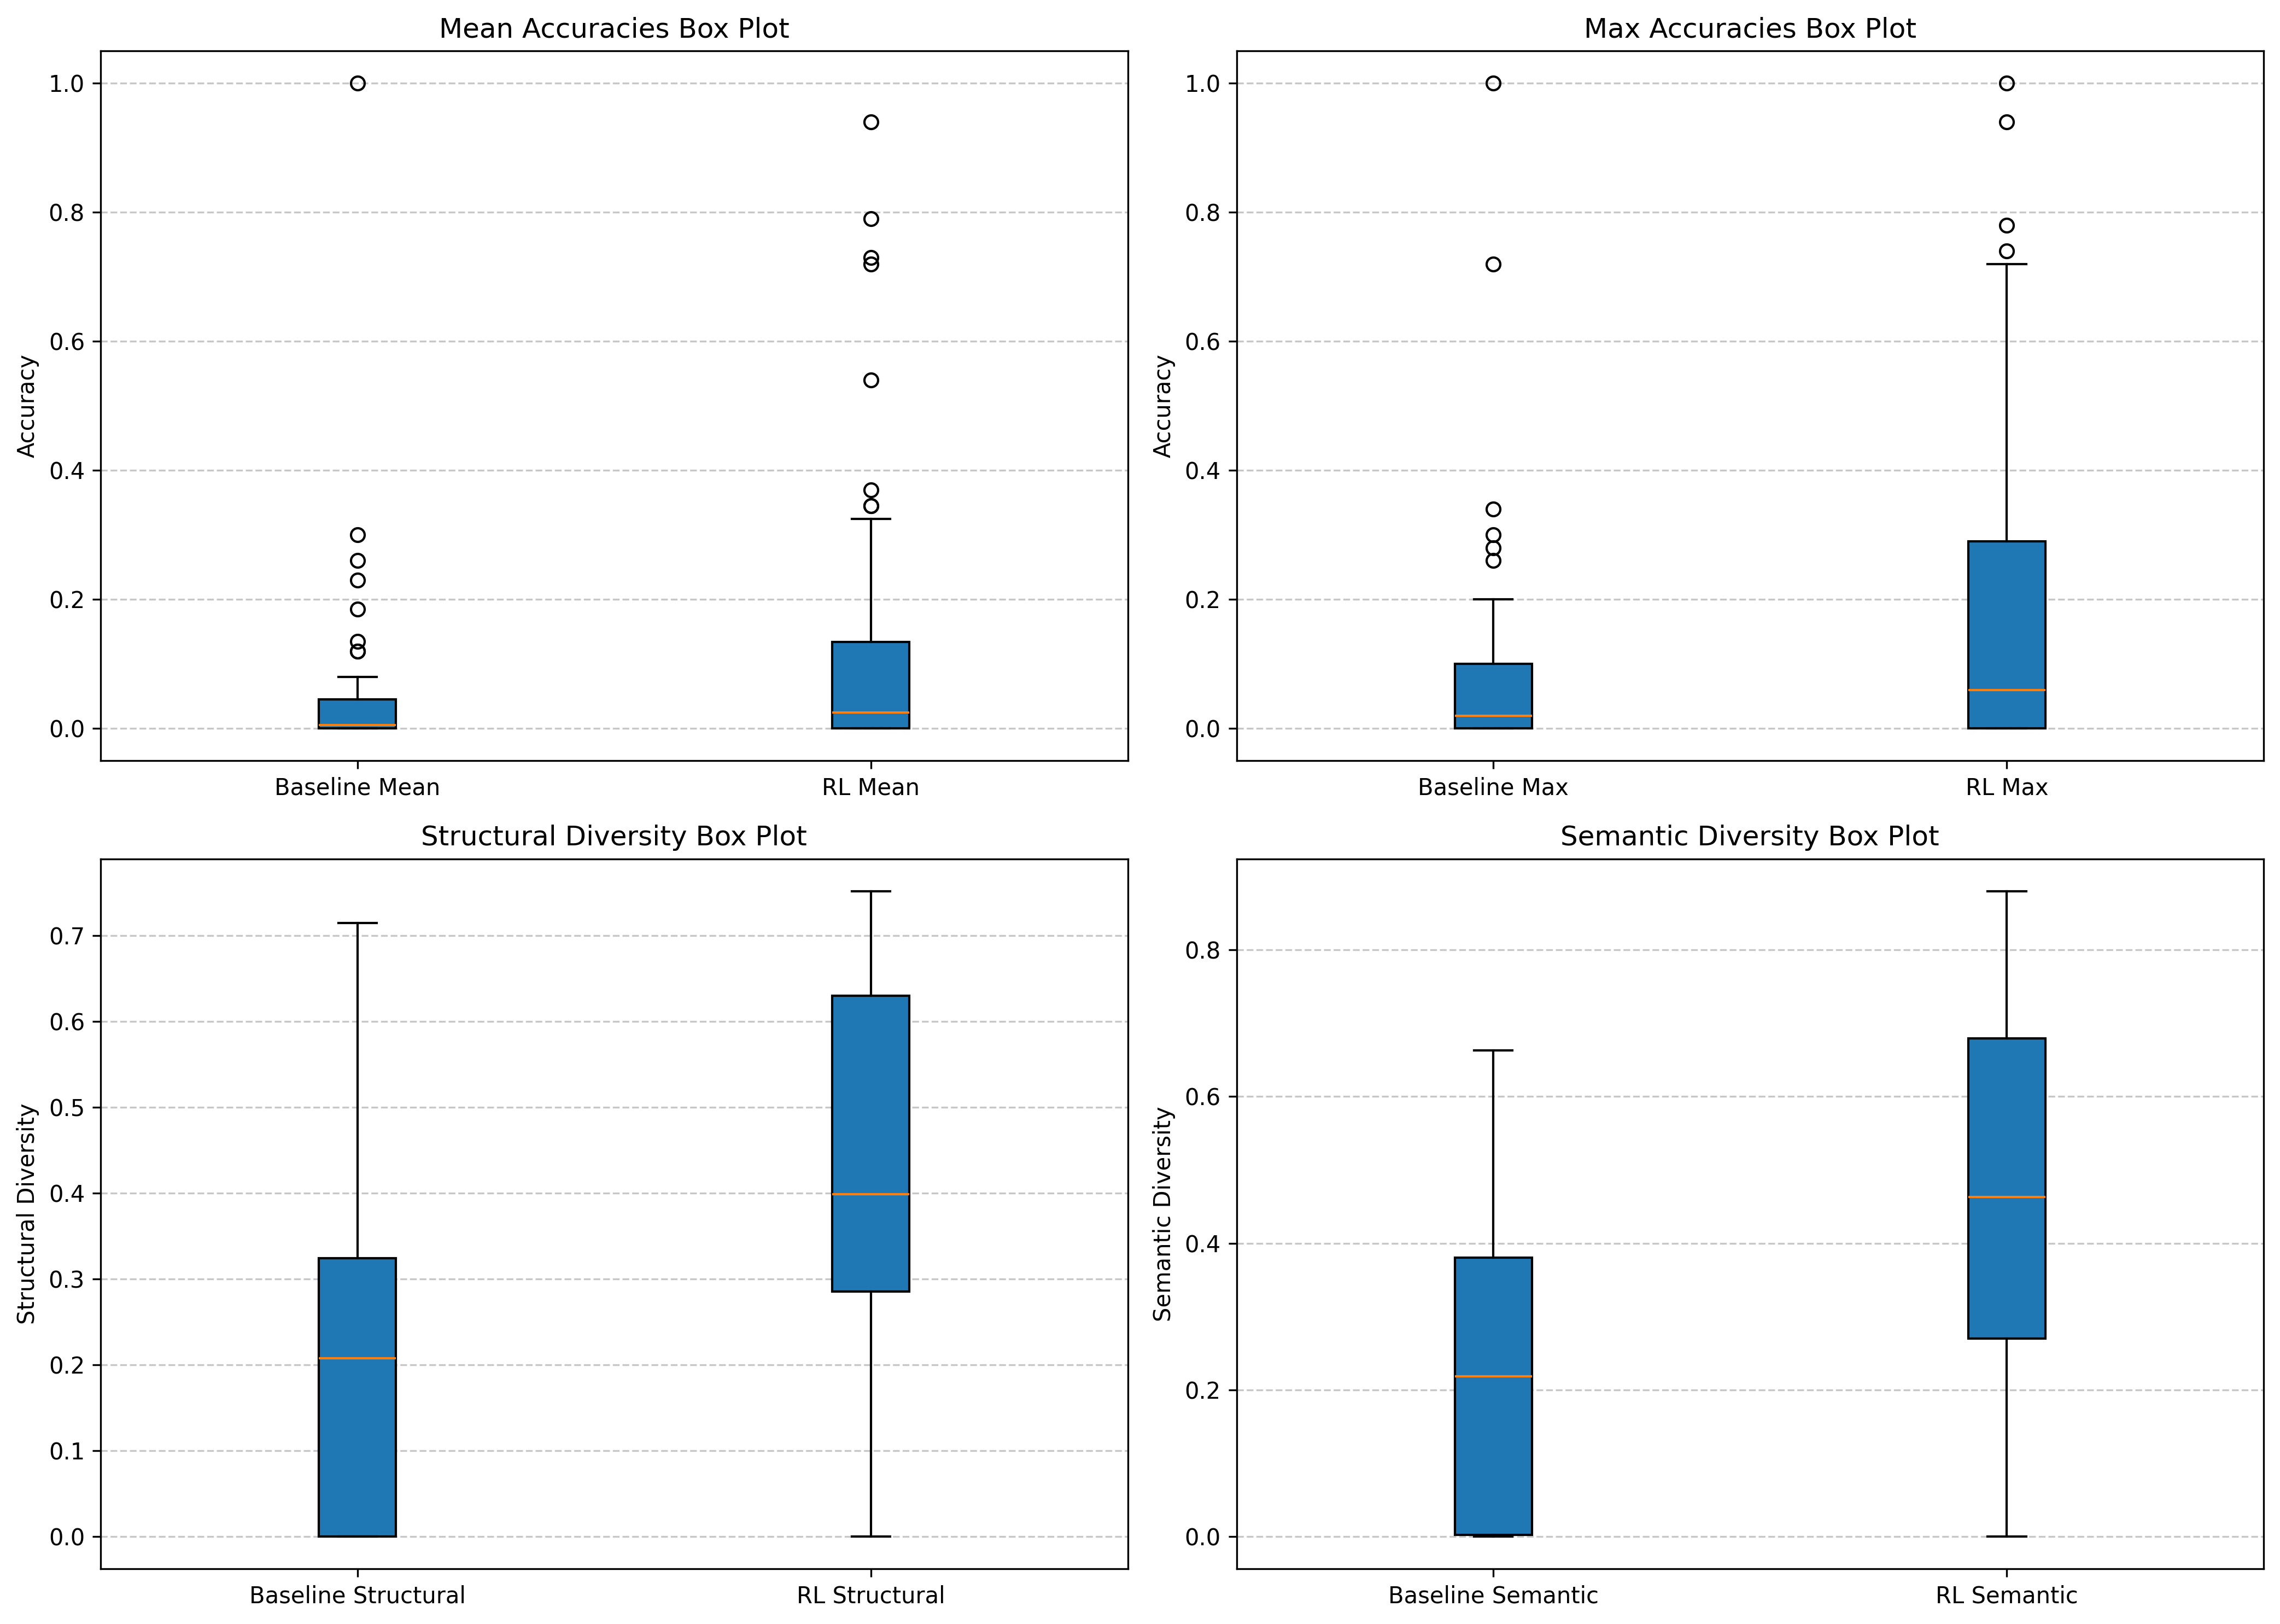

In [ ]:
# Initialize lists for accuracies and diversities
baseline_mean_accuracies, baseline_max_accuracies = [], []
rl_mean_accuracies, rl_max_accuracies = [], []
baseline_structural_divs, baseline_semantic_divs = [], []
rl_structural_divs, rl_semantic_divs = [], []

# Process baseline files
for file in baseline_files:
    with open(file, 'r') as f:
        data = json.load(f)
        # Accuracies
        mean_accuracy = sum(data['accuracies']) / len(data['accuracies'])
        max_accuracy = max(data['accuracies'])
        baseline_mean_accuracies.append(mean_accuracy)
        baseline_max_accuracies.append(max_accuracy)
        # Diversities
        structural_div = sum([div[0] for div in data['diversities_detail']]) / len(data['diversities_detail'])
        semantic_div = sum([div[1] for div in data['diversities_detail']]) / len(data['diversities_detail'])
        baseline_structural_divs.append(structural_div)
        baseline_semantic_divs.append(semantic_div)

# Process RL files
for file in rl_files:
    with open(file, 'r') as f:
        data = json.load(f)
        # Accuracies
        mean_accuracy = sum(data['accuracies']) / len(data['accuracies'])
        max_accuracy = max(data['accuracies'])
        rl_mean_accuracies.append(mean_accuracy)
        rl_max_accuracies.append(max_accuracy)
        # Diversities
        structural_div = sum([div[0] for div in data['diversities_detail']]) / len(data['diversities_detail'])
        semantic_div = sum([div[1] for div in data['diversities_detail']]) / len(data['diversities_detail'])
        rl_structural_divs.append(structural_div)
        rl_semantic_divs.append(semantic_div)

# Plot all required box plots
plt.figure(figsize=(14, 10), dpi=300)

# Mean accuracies box plot
plt.subplot(2, 2, 1)
plt.boxplot([baseline_mean_accuracies, rl_mean_accuracies], labels=["Baseline Mean", "RL Mean"], patch_artist=True)
plt.title("Mean Accuracies Box Plot")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Max accuracies box plot
plt.subplot(2, 2, 2)
plt.boxplot([baseline_max_accuracies, rl_max_accuracies], labels=["Baseline Max", "RL Max"], patch_artist=True)
plt.title("Max Accuracies Box Plot")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Structural diversity box plot
plt.subplot(2, 2, 3)
plt.boxplot([baseline_structural_divs, rl_structural_divs], labels=["Baseline Structural", "RL Structural"], patch_artist=True)
plt.title("Structural Diversity Box Plot")
plt.ylabel("Structural Diversity")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Semantic diversity box plot
plt.subplot(2, 2, 4)
plt.boxplot([baseline_semantic_divs, rl_semantic_divs], labels=["Baseline Semantic", "RL Semantic"], patch_artist=True)
plt.title("Semantic Diversity Box Plot")
plt.ylabel("Semantic Diversity")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
def avg(l):
    return sum(l)/len(l)

In [ ]:
avg(baseline_mean_accuracies), avg(rl_mean_accuracies), avg(baseline_max_accuracies), avg(rl_max_accuracies)

(0.059999999999999984, 0.13909999999999995, 0.0924, 0.19959999999999997)

In [ ]:
avg(baseline_structural_divs), avg(rl_structural_divs), avg(baseline_semantic_divs), avg(rl_semantic_divs)

(0.20728674073904968,
 0.4172431465107049,
 0.22818730346936586,
 0.4579052584681471)

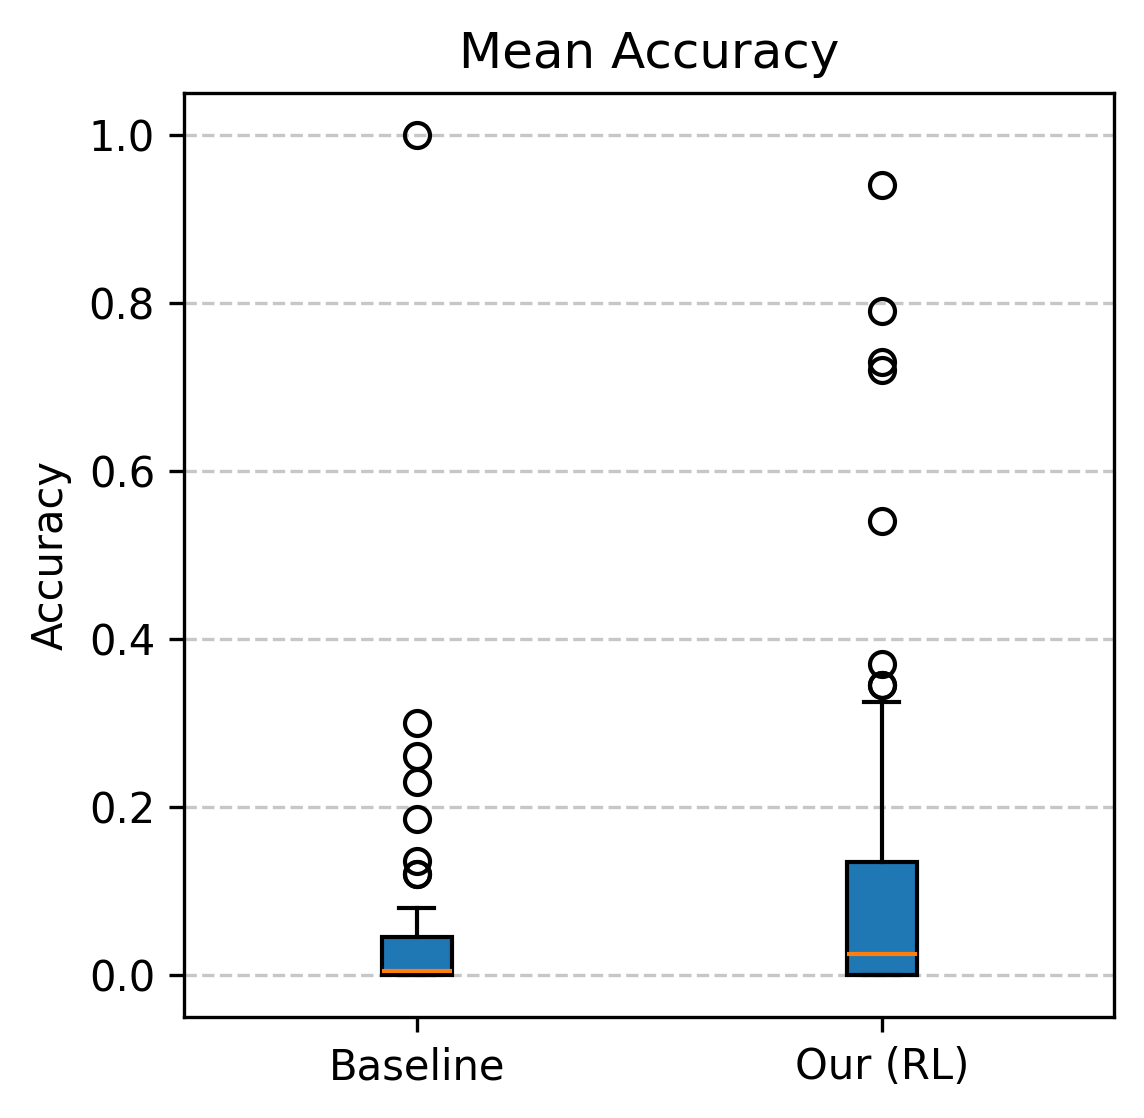

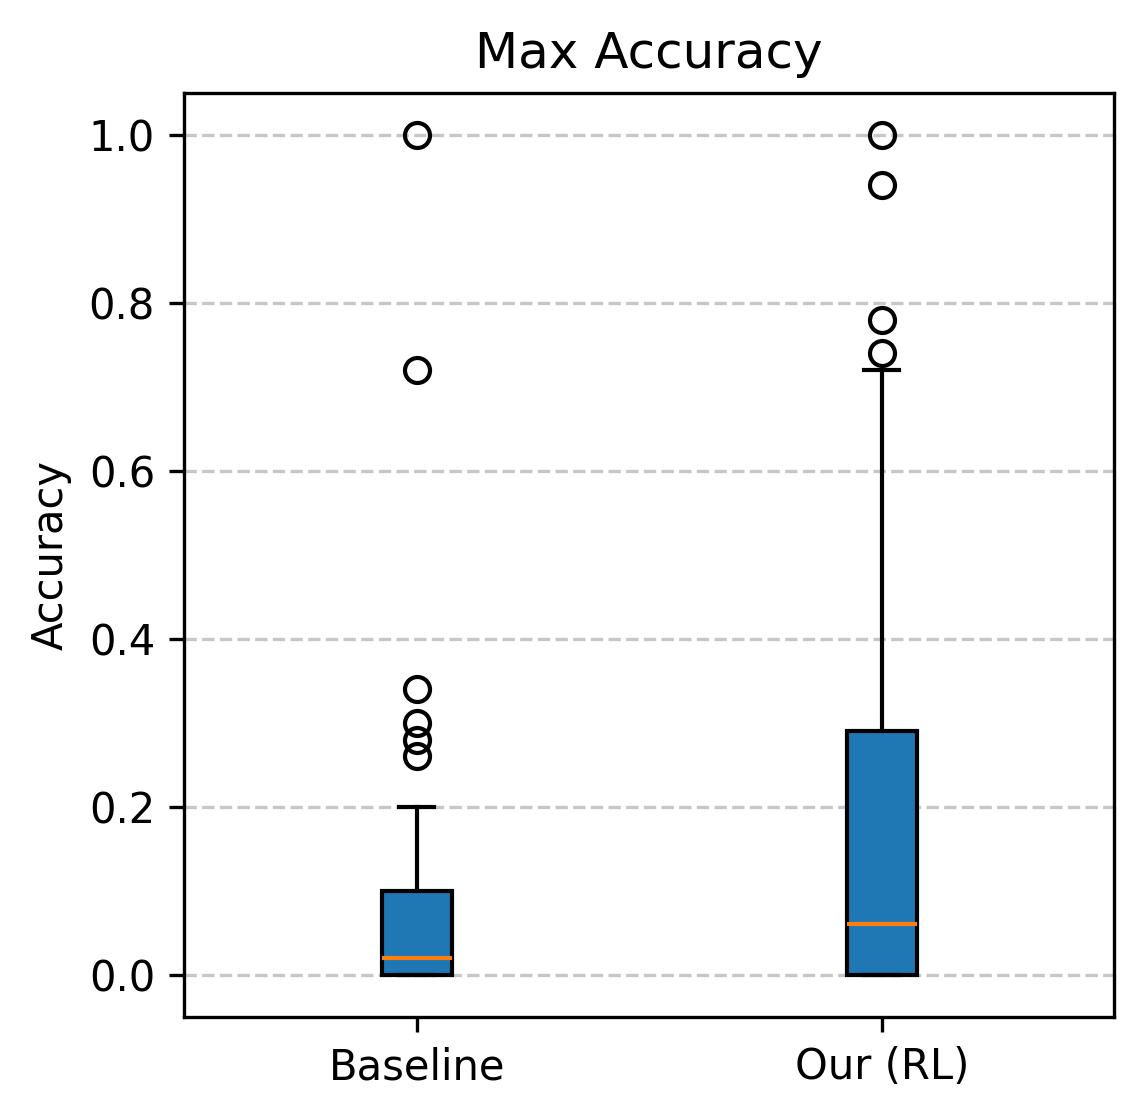

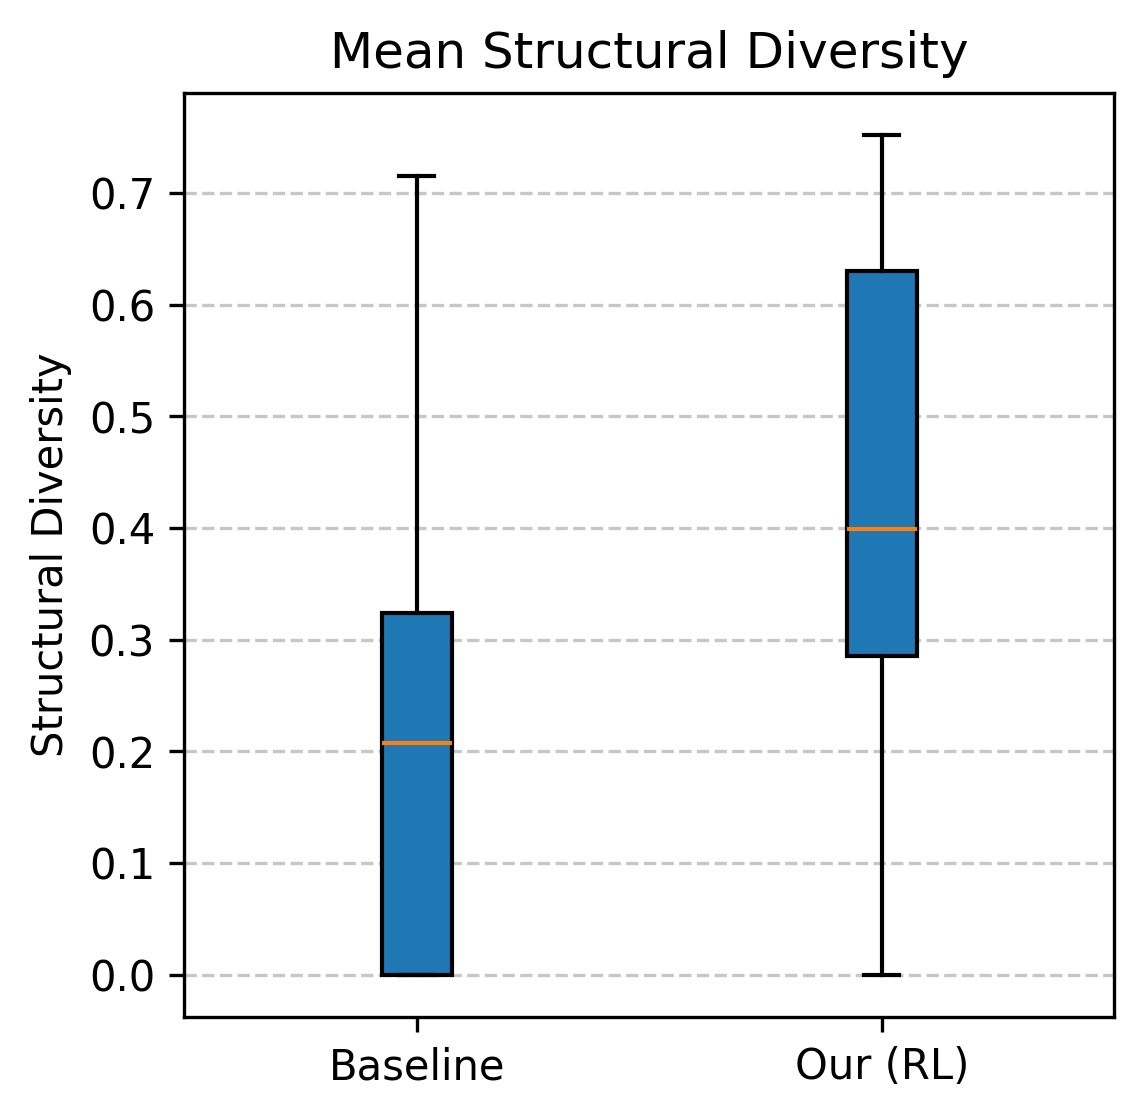

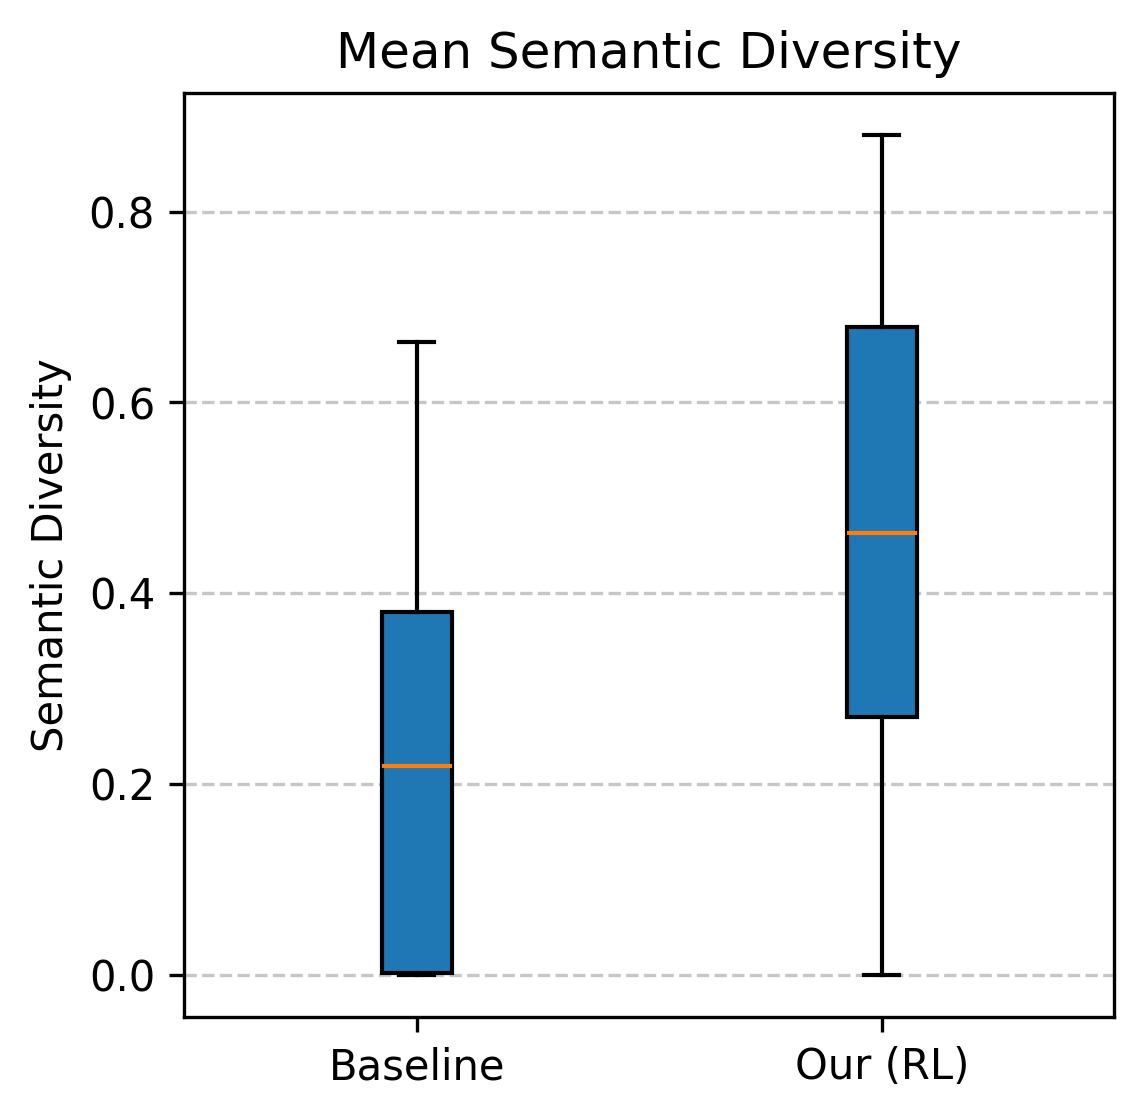

In [ ]:
# Plot each box plot in a separate figure
plt.figure(figsize=(4, 4), dpi=300)
plt.boxplot([baseline_mean_accuracies, rl_mean_accuracies], labels=["Baseline", "Our (RL)"], patch_artist=True)
plt.title("Mean Accuracy")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(4, 4), dpi=300)
plt.boxplot([baseline_max_accuracies, rl_max_accuracies], labels=["Baseline", "Our (RL)"], patch_artist=True)
plt.title("Max Accuracy")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(4, 4), dpi=300)
plt.boxplot([baseline_structural_divs, rl_structural_divs], labels=["Baseline", "Our (RL)"], patch_artist=True)
plt.title("Mean Structural Diversity")
plt.ylabel("Structural Diversity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(4, 4), dpi=300)
plt.boxplot([baseline_semantic_divs, rl_semantic_divs], labels=["Baseline", "Our (RL)"], patch_artist=True)
plt.title("Mean Semantic Diversity")
plt.ylabel("Semantic Diversity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
